###### Credit : superdatascience.com

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

In [46]:
crimes = pd.read_csv('Chicago Crime.csv')

In [47]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [25]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39065 entries, 0 to 39064
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    39065 non-null  int64  
 1   Case Number           39065 non-null  object 
 2   Date                  39065 non-null  object 
 3   Block                 39065 non-null  object 
 4   IUCR                  39065 non-null  object 
 5   Primary Type          39065 non-null  object 
 6   Description           39065 non-null  object 
 7   Location Description  38948 non-null  object 
 8   Arrest                39065 non-null  bool   
 9   Domestic              39065 non-null  bool   
 10  Beat                  39065 non-null  int64  
 11  District              39065 non-null  int64  
 12  Ward                  39065 non-null  int64  
 13  Community Area        39065 non-null  int64  
 14  FBI Code              39065 non-null  object 
 15  X Coordinate       

In [26]:
crimes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,39065.0,1.080743e+07,541147.890628,2.305900e+04,1.081895e+07,1.083481e+07,1.084974e+07,1.088999e+07
Beat,39065.0,1.159020e+03,696.580344,1.110000e+02,6.130000e+02,1.033000e+03,1.722000e+03,2.535000e+03
District,39065.0,1.136183e+01,6.959032,1.000000e+00,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,39065.0,2.313332e+01,14.027629,1.000000e+00,1.000000e+01,2.400000e+01,3.400000e+01,5.000000e+01
Community Area,39065.0,3.679662e+01,21.404500,1.000000e+00,2.300000e+01,3.100000e+01,5.500000e+01,7.700000e+01
X Coordinate,38292.0,1.164413e+06,16170.294287,1.094231e+06,1.152698e+06,1.165977e+06,1.176327e+06,1.204911e+06
Y Coordinate,38292.0,1.886645e+06,31285.098188,1.813925e+06,1.859284e+06,1.894172e+06,1.909566e+06,1.951493e+06
Year,39065.0,2.017000e+03,0.000000,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
Latitude,38292.0,4.184455e+01,0.086036,4.164461e+01,4.176919e+01,4.186543e+01,4.190754e+01,4.202254e+01
Longitude,38292.0,-8.767216e+01,0.058865,-8.792891e+01,-8.771467e+01,-8.766621e+01,-8.762855e+01,-8.752527e+01


## Cleansing

##### Missing Values

In [48]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    117
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            773
Y Coordinate            773
Year                      0
Updated On                0
Latitude                773
Longitude               773
Location                773
dtype: int64

In [49]:
crimes.dropna(axis = 0, inplace = True)

In [50]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

##### Datetime Object

In [9]:
crimes['Date'].min()

'01/01/2017 01:00:00 AM'

In [10]:
crimes['Date'].max()

'02/27/2017 12:55:00 PM'

In [11]:
# Convert datetime object
crimes['Date'] = pd.to_datetime(crimes['Date'].str[0:10])

In [51]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [52]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38192 entries, 11 to 39064
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    38192 non-null  int64  
 1   Case Number           38192 non-null  object 
 2   Date                  38192 non-null  object 
 3   Block                 38192 non-null  object 
 4   IUCR                  38192 non-null  object 
 5   Primary Type          38192 non-null  object 
 6   Description           38192 non-null  object 
 7   Location Description  38192 non-null  object 
 8   Arrest                38192 non-null  bool   
 9   Domestic              38192 non-null  bool   
 10  Beat                  38192 non-null  int64  
 11  District              38192 non-null  int64  
 12  Ward                  38192 non-null  int64  
 13  Community Area        38192 non-null  int64  
 14  FBI Code              38192 non-null  object 
 15  X Coordinate          3

## Analysis

##### 12 Most Common Crimes

In [13]:
crimes['Primary Type'].nunique()

30

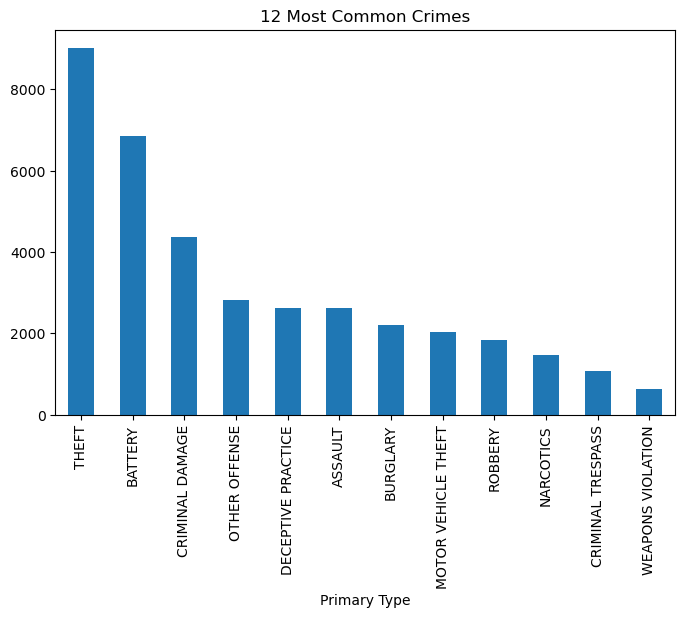

In [14]:
plt.figure(figsize = (8, 5))
crimes['Primary Type'].value_counts().head(12).plot(kind = 'bar')

plt.title('12 Most Common Crimes')
plt.show()

##### Crime Types that have Median above 50 Crimes a Day

In [15]:
count_by_date = pd.DataFrame(crimes.groupby(['Primary Type', 'Date']).count()['ID'].reset_index())
count_by_date.columns = ['Crime Type', 'Date', 'Count']

In [16]:
count_by_date.head()

,Crime Type,Date,Count
0,ARSON,2017-01-02,3
1,ARSON,2017-01-03,1
2,ARSON,2017-01-04,1
3,ARSON,2017-01-06,1
4,ARSON,2017-01-08,1


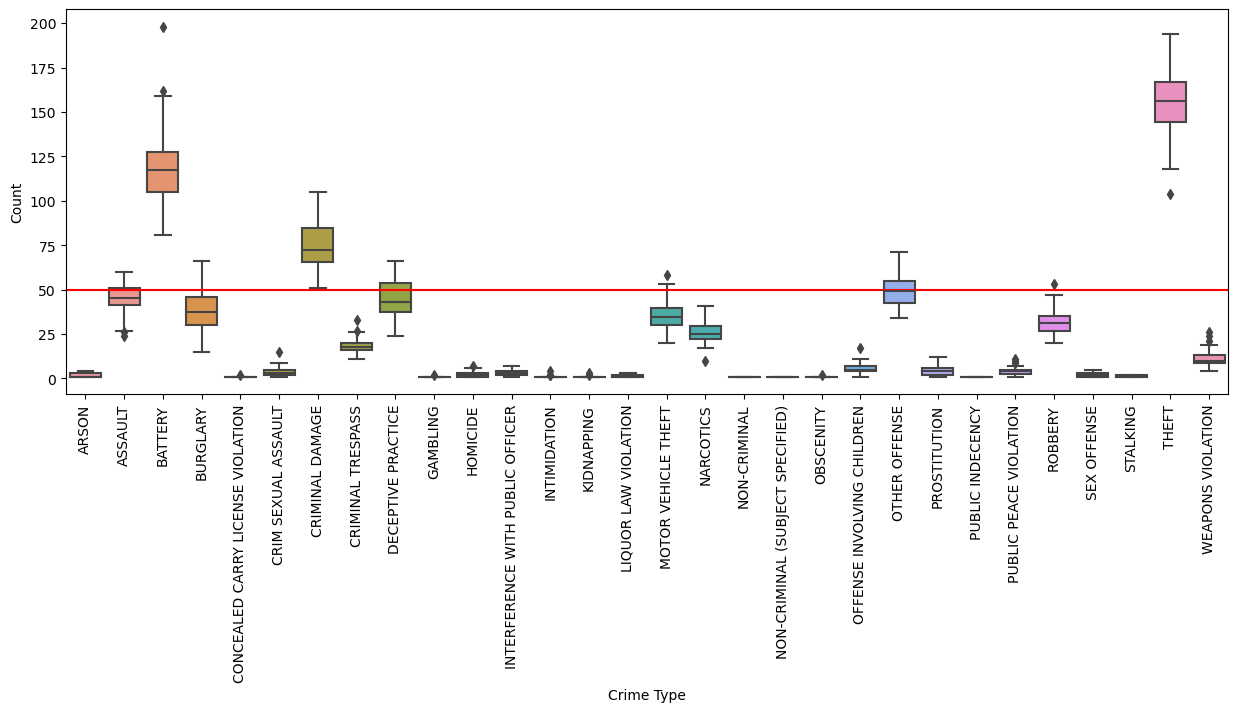

In [17]:
plt.figure(figsize = (15, 5))
sns.boxplot(count_by_date, x = 'Crime Type', y = 'Count')

plt.axhline(50, color = 'red')
plt.xticks(rotation = 90)
plt.show()

* Battery, Criminal Damage, Theft crimes pass the median of 50 crimes per day
* In terms of battery offenses, there are 2 days with outlier behavior where crime reports have occurred more than 160 times in a day in Chicago
* As to theft offenses, having a day with less than 125 crime reports is considered outlining behavior

##### Geographic Areas of Battery, Criminal Damage, Theft Incidents

In [62]:
theft = crimes[crimes['Primary Type'] == 'THEFT']
criminal_damage = crimes[crimes['Primary Type'] == 'CRIMINAL DAMAGE']
battery = crimes[crimes['Primary Type'] == 'BATTERY']

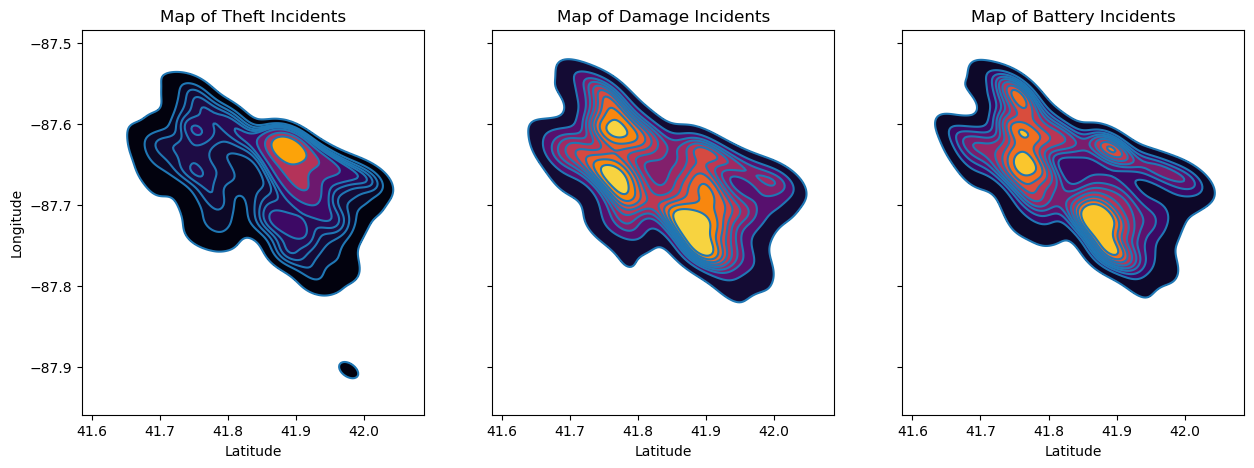

In [76]:
f, axes = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey = True)

k1 = sns.kdeplot(theft, x = 'Latitude', y = 'Longitude', ax = axes[0], shade = True, cmap = 'inferno')
k1_contour = sns.kdeplot(theft, x = 'Latitude', y = 'Longitude', ax = axes[0])

k2 = sns.kdeplot(criminal_damage, x = 'Latitude', y = 'Longitude', ax = axes[1], shade = True, cmap = 'inferno')
k2_contour = sns.kdeplot(criminal_damage, x = 'Latitude', y = 'Longitude', ax = axes[1])

k3 = sns.kdeplot(battery, x = 'Latitude', y = 'Longitude', ax = axes[2], shade = True, cmap = 'inferno')
k3_contour = sns.kdeplot(battery, x = 'Latitude', y = 'Longitude', ax = axes[2])

k1.title.set_text('Map of Theft Incidents')
k2.title.set_text('Map of Damage Incidents')
k3.title.set_text('Map of Battery Incidents')

plt.show()

* Battery and criminal damage incidents seem closely related geographically (incidents happening often in the south-east, west area)
* Theft incidents are predominent in the northern area of Chicago

#####  mean of the coordinates (latitude and longitude).

In [77]:
theft.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
14,10837753,JA140026,01/01/2017 12:01:00 AM,060XX N KENMORE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,48,77,06,1168149.0,1940253.0,2017,02/14/2017 03:49:42 PM,41.991594,-87.656859,"(41.991593665, -87.656859002)"
18,10805534,JA104522,01/01/2017 12:01:00 AM,033XX W 63RD ST,0820,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,...,15,66,06,1155257.0,1862653.0,2017,02/14/2017 03:49:42 PM,41.778921,-87.706365,"(41.778921304, -87.706364915)"
21,10803320,JA102544,01/01/2017 12:01:00 AM,064XX S COAST GUARD DR,0890,THEFT,FROM BUILDING,PARK PROPERTY,False,False,...,5,42,06,1190888.0,1862722.0,2017,02/14/2017 03:49:42 PM,41.778324,-87.575738,"(41.778323507, -87.575737674)"
24,10802636,JA101626,01/01/2017 12:01:00 AM,043XX W 26TH ST,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,22,30,06,1147996.0,1886369.0,2017,02/14/2017 03:49:42 PM,41.844144,-87.732377,"(41.844143697, -87.732376706)"
26,10801574,JA100598,01/01/2017 12:01:00 AM,003XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,27,28,06,1170994.0,1902180.0,2017,02/14/2017 03:49:42 PM,41.887058,-87.647515,"(41.88705768, -87.647514742)"
